In [421]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=(12,9)
df_저 = pd.read_csv('data/어장환경관측자료(저층).csv')

In [422]:
font_path = "data/서울한강 장체EB.TTF"  # 실제 한글 폰트 파일 경로로 변경해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [423]:
import pandas as pd

# 데이터프레임을 읽어옵니다.
df_저 = pd.read_csv('data/어장환경관측자료(저층).csv')

# 행별로 0인 값의 개수를 세어 새로운 컬럼을 만듭니다.
df_저['zero_count'] = (df_저 == 0).sum(axis=1)

# 0인 값의 개수가 2개 이상인 행들을 선택합니다.
rows_to_delete = df_저[df_저['zero_count'] >= 2]

# 선택된 행들을 삭제합니다.
df_저 = df_저.drop(rows_to_delete.index)

# 'zero_count' 컬럼을 삭제합니다.
df_저 = df_저.drop('zero_count', axis=1)

# 결과 데이터프레임을 확인합니다.
print(df_저)


       어장명  정점  정점2          위도          경도 어장종류    년도   월   일 기상  ...  \
0      곰소만   2   38  126.589167   35.565833   패류  2011  12   1  -  ...   
1      곰소만   2   38  126.589167   35.565833   패류  2011  10   1  -  ...   
2      곰소만   2   38  126.589167   35.565833   패류  2011   8   1  -  ...   
3      곰소만   2   38  126.589167   35.565833   패류  2011   6   1  -  ...   
4      곰소만   2   38  126.589167   35.565833   패류  2011   4   1  -  ...   
...    ...  ..  ...         ...         ...  ...   ...  ..  .. ..  ...   
15116  서귀포   1    4   33.216667  126.490000   연안  2013  10  29  -  ...   
15117  서귀포   1    4   33.216667  126.490000   연안  2013   8   8  -  ...   
15118  서귀포   1    4   33.216667  126.490000   연안  2013   6  12  -  ...   
15119  서귀포   1    4   33.216667  126.490000   연안  2013   4   4  -  ...   
15120  서귀포   1    4   33.216667  126.490000   연안  2013   2  21  -  ...   

       NO3-N(저)  NO2-N(저)  DIN(저)  TN(저)  DIP(저)  TP(저)  SIO2-SI(저)  CHL-A(저)  \
0         0.160     0.012   0.

In [424]:
# 수정된 데이터프레임을 CSV 파일로 저장합니다.
# df_저.to_csv('어장환경관측자료(저)_결측값제거.csv', index=False)

In [425]:
df_저 = pd.read_csv('data/어장환경관측자료(저층).csv')

In [426]:
df_저.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15121 entries, 0 to 15120
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   어장명         15121 non-null  object 
 1   정점          15121 non-null  int64  
 2   정점2         15121 non-null  int64  
 3   위도          15121 non-null  float64
 4   경도          15121 non-null  float64
 5   어장종류        15120 non-null  object 
 6   년도          15121 non-null  int64  
 7   월           15121 non-null  int64  
 8   일           15121 non-null  int64  
 9   기상          15121 non-null  object 
 10  수심(m)       15113 non-null  float64
 11  수온(저)       14900 non-null  float64
 12  수온(차이)      15121 non-null  float64
 13  염분(저)       14900 non-null  float64
 14  Ph(저)       14900 non-null  float64
 15  DO(저)       14900 non-null  float64
 16  COD(저)      14899 non-null  float64
 17  NH4-N(저)    14900 non-null  float64
 18  NO3-N(저)    14900 non-null  float64
 19  NO2-N(저)    14900 non-nul

In [427]:
df_저.isnull().sum()

어장명             0
정점              0
정점2             0
위도              0
경도              0
어장종류            1
년도              0
월               0
일               0
기상              0
수심(m)           8
수온(저)         221
수온(차이)          0
염분(저)         221
Ph(저)         221
DO(저)         221
COD(저)        222
NH4-N(저)      221
NO3-N(저)      221
NO2-N(저)      221
DIN(저)        221
TN(저)         221
DIP(저)        221
TP(저)         221
SIO2-SI(저)    221
CHL-A(저)      221
SS(저)         221
투명도           221
dtype: int64

In [428]:
df_저 = df_저.dropna()

In [429]:
df_저.isnull().sum()

어장명           0
정점            0
정점2           0
위도            0
경도            0
어장종류          0
년도            0
월             0
일             0
기상            0
수심(m)         0
수온(저)         0
수온(차이)        0
염분(저)         0
Ph(저)         0
DO(저)         0
COD(저)        0
NH4-N(저)      0
NO3-N(저)      0
NO2-N(저)      0
DIN(저)        0
TN(저)         0
DIP(저)        0
TP(저)         0
SIO2-SI(저)    0
CHL-A(저)      0
SS(저)         0
투명도           0
dtype: int64

In [430]:
(df_저['DO(저)']<=3).value_counts()

False    14513
True       385
Name: DO(저), dtype: int64

In [478]:
df2 = df_저[df_저['DO(저)']<=3] #저층 DO가 3이하인 데이터 385개
df2

,어장명,정점,정점2,위도,경도,어장종류,년도,월,일,기상,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
1994,가로림만,6,8,36.931111,126.344722,패류,2010,12,1,-,...,0.132,0.005,0.148,0.562,0.023,0.024,0.333,0.29,16.0,0.8
2000,가로림만,4,7,36.914444,126.365278,패류,2010,12,1,-,...,0.123,0.004,0.136,0.740,0.024,0.027,0.282,0.34,20.4,0.7
2338,천수만,1,34,36.614722,126.370556,패류,2010,8,9,-,...,0.005,0.005,0.235,0.251,0.072,0.081,0.954,1.75,15.0,1.5
2423,천수만,2,32,36.594722,126.403333,굴,2017,8,5,맑음,...,0.021,0.004,0.353,0.559,0.072,0.078,1.598,1.97,46.0,1.4
4124,진해만,8,135,35.944722,128.443889,패류,2010,10,14,-,...,0.039,0.005,0.318,0.596,0.086,0.088,1.821,0.75,1.6,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10890,통영외안,13,16,34.726667,128.047500,어류,2021,8,4,맑음,...,0.013,0.002,0.020,0.265,0.006,0.050,0.359,1.35,2.6,7.0
11153,가막만,5,29,34.714167,127.738611,패류,2010,8,4,-,...,0.030,0.006,4.590,0.150,0.005,0.019,0.461,4.99,5.0,2.0
12384,완도,3,3,34.573611,127.687222,해조류,2009,5,13,-,...,0.009,0.043,0.053,0.912,0.005,0.027,0.200,1.70,19.0,1.5
12437,완도,2,1,34.572500,127.729444,해조류,2009,5,13,-,...,0.016,0.023,0.040,0.831,0.006,0.031,0.213,2.24,31.0,1.3


In [432]:
group = df2.groupby('어장명').size().reset_index(name='개수')
group

,어장명,개수
0,가로림만,2
1,가막만,4
2,거제도남안,2
3,고성자란만,16
4,마산만,25
5,부산,1
6,사천,1
7,섬진강하구,4
8,완도,2
9,진주만,1


=> 총 14곳의 어장에서 빈산소수괴가 발생함

In [433]:
group정점 = df2.groupby(['어장명','정점2']).size().reset_index(name='개수')
group정점

,어장명,정점2,개수
0,가로림만,7,1
1,가로림만,8,1
2,가막만,2,1
3,가막만,29,1
4,가막만,35,1
...,...,...,...
112,통영,33,1
113,통영,34,1
114,통영외안,16,2
115,통영외안,33,2


=> 총 91개의 정점에서 빈산소수괴 발생

In [434]:
df2['어장명'].unique()

array(['가로림만', '천수만', '진해만', '마산만', '부산', '진주만', '고성자란만', '섬진강하구', '사천',
       '통영', '통영외안', '거제도남안', '가막만', '완도'], dtype=object)

In [435]:
df2_ = df_저[df_저['DO(저)']>3] #저층 DO가 3초과 데이터
df2_ 

,어장명,정점,정점2,위도,경도,어장종류,년도,월,일,기상,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
0,곰소만,2,38,126.589167,35.565833,패류,2011,12,1,-,...,0.160,0.012,0.262,0.333,0.023,0.025,0.481,1.04,169.4,0.7
1,곰소만,2,38,126.589167,35.565833,패류,2011,10,1,-,...,0.012,0.002,0.039,0.097,0.012,0.012,0.133,0.45,77.8,1.3
2,곰소만,2,38,126.589167,35.565833,패류,2011,8,1,-,...,0.258,0.056,0.496,0.710,0.042,0.078,0.897,0.78,124.6,0.3
3,곰소만,2,38,126.589167,35.565833,패류,2011,6,1,-,...,0.014,0.005,0.036,0.455,0.004,0.018,0.250,1.81,37.0,0.7
4,곰소만,2,38,126.589167,35.565833,패류,2011,4,1,-,...,0.002,0.001,0.006,0.289,0.001,0.030,0.038,1.03,21.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15116,서귀포,1,4,33.216667,126.490000,연안,2013,10,29,-,...,0.027,0.002,0.039,0.039,0.002,0.006,0.104,1.03,4.4,12.4
15117,서귀포,1,4,33.216667,126.490000,연안,2013,8,8,-,...,0.015,0.002,0.027,0.055,0.001,0.006,0.256,0.96,2.2,13.8
15118,서귀포,1,4,33.216667,126.490000,연안,2013,6,12,-,...,0.063,0.005,0.087,0.170,0.010,0.015,0.221,0.67,0.7,10.9
15119,서귀포,1,4,33.216667,126.490000,연안,2013,4,4,-,...,0.035,0.009,0.062,0.220,0.006,0.013,0.180,1.33,0.3,10.2


In [436]:
df2진해만 = df2[df2['어장명']=='진해만'] # 저층 3이하 진해만 데이터
df2진해만

,어장명,정점,정점2,위도,경도,어장종류,년도,월,일,기상,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
4124,진해만,8,135,35.944722,128.443889,패류,2010,10,14,-,...,0.039,0.005,0.318,0.596,0.086,0.088,1.821,0.75,1.60,5.7
4125,진해만,8,135,35.944722,128.443889,패류,2010,8,24,-,...,0.028,0.001,0.189,0.453,0.062,0.098,1.069,0.85,2.65,3.0
5341,진해만,23,133,35.199167,128.585556,패류,2012,10,9,-,...,0.093,0.024,0.403,0.577,0.055,0.069,1.175,2.47,6.70,3.0
5342,진해만,23,133,35.199167,128.585556,패류,2012,8,7,-,...,0.006,0.002,0.056,0.572,0.034,0.086,1.240,18.68,9.40,1.0
5397,진해만,2,131,35.178333,128.589167,패류,2011,8,12,-,...,0.036,0.010,0.511,0.520,0.086,0.089,1.306,5.16,4.60,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8434,진해만,18,5,34.905000,128.432500,굴,2016,6,4,비,...,0.005,0.001,0.011,0.147,0.001,0.012,0.838,4.91,6.70,3.5
8438,진해만,18,5,34.905000,128.432500,패류,2015,6,3,맑음,...,0.001,0.001,0.009,0.268,0.003,0.029,0.822,6.63,6.50,6.0
8443,진해만,40,5,34.905000,128.432500,패류,2014,6,4,맑음(바람),...,0.016,0.001,0.024,0.133,0.002,0.017,0.480,3.28,9.30,5.0
8564,진해만,36,3,34.900833,128.433333,패류,2012,10,9,-,...,0.020,0.007,0.221,0.402,0.074,0.100,1.910,1.84,3.50,8.0


In [437]:
df2_진해만 = df2_[df2_['어장명']=='진해만'] #저층 3이하 진해만 데이터
df2_진해만

,어장명,정점,정점2,위도,경도,어장종류,년도,월,일,기상,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
4112,진해만,26,136,35.966667,128.600833,패류,2012,12,11,-,...,0.107,0.014,0.159,0.314,0.027,0.035,0.709,0.03,4.10,7.0
4113,진해만,26,136,35.966667,128.600833,패류,2012,10,9,-,...,0.083,0.019,0.138,0.330,0.022,0.033,0.539,0.23,3.90,5.5
4114,진해만,26,136,35.966667,128.600833,패류,2012,8,7,-,...,0.014,0.006,0.077,0.314,0.021,0.038,0.511,3.46,3.45,3.9
4123,진해만,8,135,35.944722,128.443889,패류,2010,12,10,-,...,0.044,0.007,0.083,0.308,0.029,0.040,0.427,5.31,1.35,7.5
4126,진해만,8,135,35.944722,128.443889,패류,2010,4,7,-,...,0.008,0.001,0.017,0.144,0.008,0.019,0.197,5.46,1.95,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,진해만,19,2,34.894444,128.476111,패류,2013,6,4,-,...,0.006,0.000,0.010,0.203,0.001,0.018,0.302,2.55,4.00,5.0
8648,진해만,19,2,34.894444,128.476111,패류,2013,2,5,-,...,0.020,0.001,0.039,0.124,0.003,0.021,0.084,1.30,3.35,6.0
8765,진해만,16,1,34.883611,128.750278,패류,2012,12,13,-,...,0.151,0.013,0.223,0.267,0.022,0.044,0.710,0.03,11.90,2.0
8766,진해만,16,1,34.883611,128.750278,패류,2012,10,12,-,...,0.028,0.007,0.047,0.283,0.008,0.027,0.270,5.78,4.00,4.5


In [438]:
df2진해만['정점2'].unique()

array([135, 133, 131, 130, 127, 125, 117, 112, 109, 108, 107, 105, 103,
        98,  94,  93,  90,  91,  88,  86,  80,  79,  77,  76,  74,  73,
        72,  69,  67,  66,  65,  63,  61,  59,  57,  56,  55,  54,  52,
        51,  50,  49,  46,  47,  45,  43,  41,  40,  39,  38,  37,  36,
        35,  34,  33,  32,  30,  29,  28,  27,  26,  24,  22,  21,  20,
        18,  15,  14,  12,  11,  10,   9,   6,   5,   3], dtype=int64)

In [439]:
group_정점 = df2진해만.groupby('정점2').size().reset_index(name='개수')
print(group_정점)

    정점2  개수
0     3   2
1     5  10
2     6   1
3     9   3
4    10   1
..  ...  ..
70  127   1
71  130   1
72  131   1
73  133   2
74  135   2

[75 rows x 2 columns]


In [440]:
df2진해만 = df2진해만[(df2진해만['정점2'] == 3)]
df2진해만

,어장명,정점,정점2,위도,경도,어장종류,년도,월,일,기상,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
8564,진해만,36,3,34.900833,128.433333,패류,2012,10,9,-,...,0.020,0.007,0.221,0.402,0.074,0.100,1.910,1.84,3.5,8.0
8565,진해만,36,3,34.900833,128.433333,패류,2012,8,7,-,...,0.004,0.001,0.185,0.480,0.059,0.097,1.518,11.32,5.4,7.0


In [441]:
df2_진해만 = df2_진해만[(df2_진해만['정점2'] == 4)]
df2_진해만.head()

,어장명,정점,정점2,위도,경도,어장종류,년도,월,일,기상,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
8550,진해만,23,4,34.901389,128.432222,패류,2009,8,1,-,...,0.002,0.004,0.017,0.192,0.007,0.024,0.305,8.22,9.3,3.0
8551,진해만,23,4,34.901389,128.432222,패류,2009,5,1,-,...,0.011,0.002,0.064,0.334,0.008,0.016,0.450,2.21,2.4,6.0


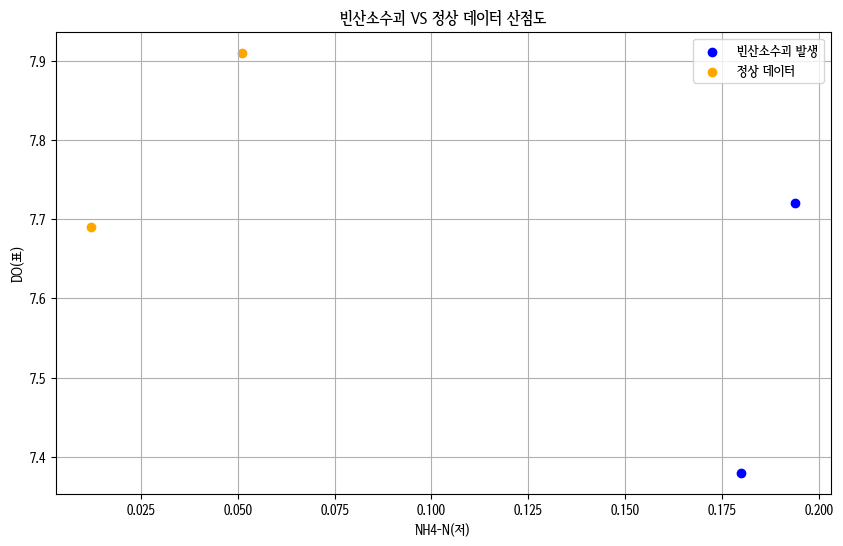

In [442]:
# 산점도 시각화 => 진해만 
plt.figure(figsize=(10, 6))
plt.scatter(df2진해만['NH4-N(저)'], df2진해만['Ph(저)'], color='blue', label='빈산소수괴 발생')
plt.scatter(df2_진해만['NH4-N(저)'], df2_진해만['Ph(저)'], color='orange', label='정상 데이터')
plt.xlabel('NH4-N(저)')
plt.ylabel('DO(표)')
plt.title('빈산소수괴 VS 정상 데이터 산점도')
plt.legend()
plt.grid(True)
plt.show()

In [443]:
df2 = df2[df2['어장명']=='진해만']
df2['정점2']

4124    135
4125    135
5341    133
5342    133
5397    131
       ... 
8434      5
8438      5
8443      5
8564      3
8565      3
Name: 정점2, Length: 292, dtype: int64

## 어장 및 정점 별 heatmap

가로림만 정점별 heatmap

In [444]:
df가로림만 = df_저[df_저['어장명']=='가로림만']

In [445]:
df가로림만7 = df가로림만[df가로림만['정점2']==7]

In [446]:
df가로림만7유 = df가로림만7[df가로림만7['DO(저)']<=3]

In [447]:
df가로림만7무 = df가로림만7[df가로림만7['DO(저)']>3]

In [448]:
df가로림만8 = df가로림만[df가로림만['정점2']==8]

In [449]:
df가로림만8유 = df가로림만8[df가로림만8['DO(저)']<=3]

In [450]:
df가로림만8무 = df가로림만8[df가로림만8['DO(저)']>3]

In [451]:
df가로림만 = df가로림만[['수온(저)','수온(차이)','염분(저)','Ph(저)',
           'COD(저)', 'NH4-N(저)', 'NO3-N(저)', 'NO2-N(저)','DO(저)',
           'DIN(저)', 'TN(저)', 'DIP(저)', 'TP(저)','SIO2-SI(저)','CHL-A(저)','SS(저)','투명도']]

In [452]:
가로림만_corr = df가로림만.corr()

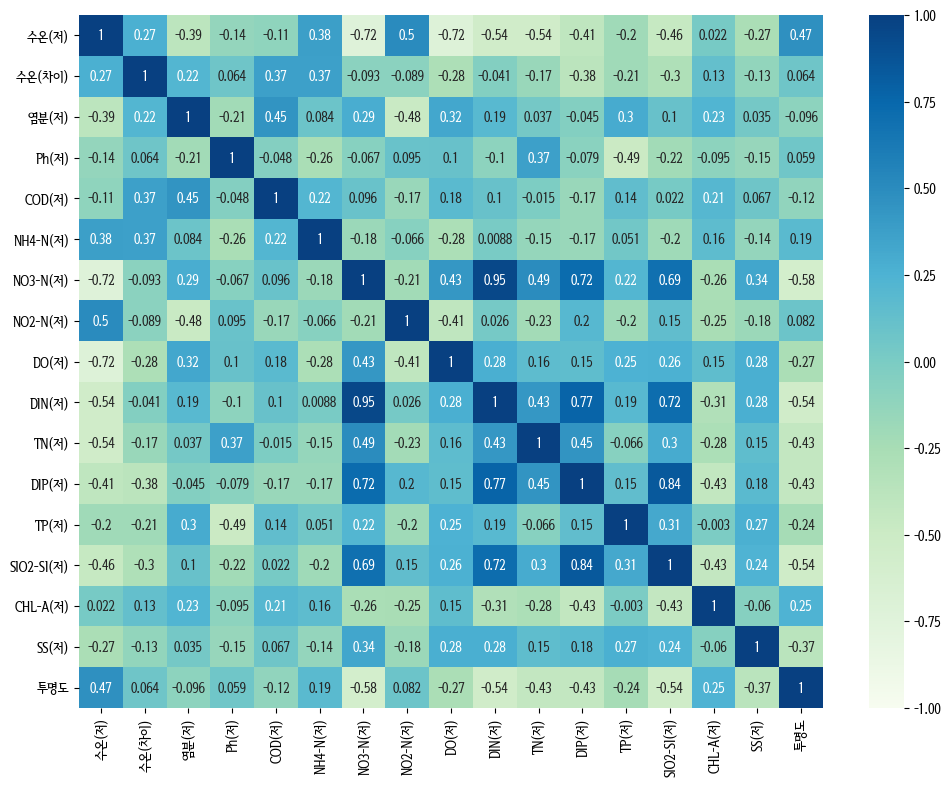

<Figure size 1200x900 with 0 Axes>

In [453]:
tips_corr_heatmap = sns.heatmap(가로림만_corr,
                                cbar=True,
                                annot=True,
                                cmap='GnBu',
                                vmin=-1.0,
                                vmax=1.0)
plt.figure(figsize=(12, 9))
plt.show()

가로림만 정점 7,8 산점도

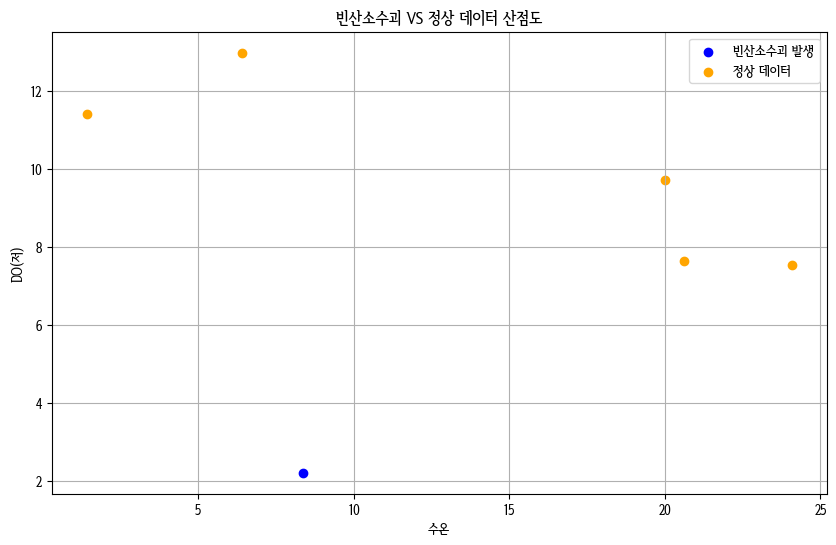

In [454]:
plt.figure(figsize=(10, 6))
plt.scatter(df가로림만7유['수온(저)'], df가로림만7유['DO(저)'], color='blue', label='빈산소수괴 발생')
plt.scatter(df가로림만7무['수온(저)'], df가로림만7무['DO(저)'], color='orange', label='정상 데이터')
plt.xlabel('수온')
plt.ylabel('DO(저)')
plt.title('빈산소수괴 VS 정상 데이터 산점도')
plt.legend()
plt.grid(True)
plt.show()

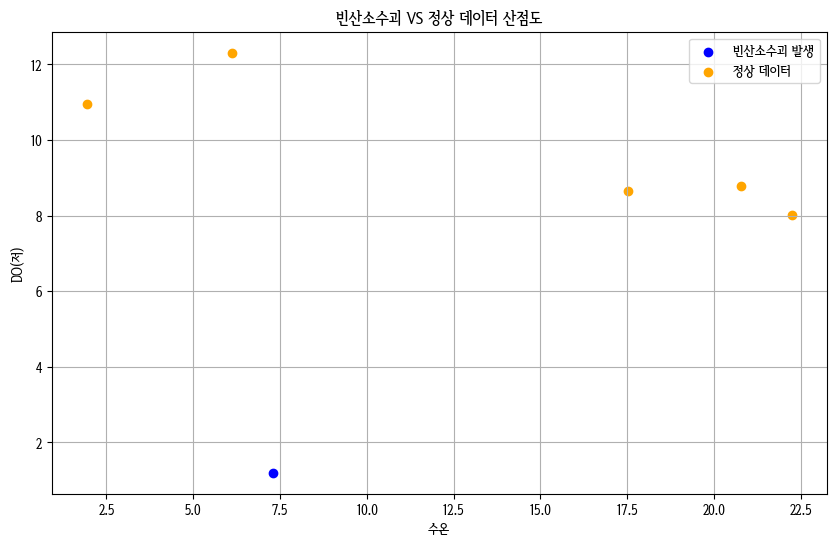

In [455]:
plt.figure(figsize=(10, 6))
plt.scatter(df가로림만8유['수온(저)'], df가로림만8유['DO(저)'], color='blue', label='빈산소수괴 발생')
plt.scatter(df가로림만8무['수온(저)'], df가로림만8무['DO(저)'], color='orange', label='정상 데이터')
plt.xlabel('수온')
plt.ylabel('DO(저)')
plt.title('빈산소수괴 VS 정상 데이터 산점도')
plt.legend()
plt.grid(True)
plt.show()

천수만 정점별 heatmap

In [456]:
df천수만 = df_저[df_저['어장명']=='천수만']

In [457]:
df천수만['정점2'].unique()

array([41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 27, 28, 25, 26,
       23, 24, 22, 21, 20, 19, 18, 17, 16, 15, 14, 12, 13, 11, 10,  9,  8,
        6,  7,  5,  4,  3,  2,  1], dtype=int64)

## folium으로 정점 찍기

In [461]:
m = folium.Map(
    location=[35.0211,128.6810],
    zoom_start=10
)

tooltip = 'Click'

# for문, f-string이용
for i in range(df2.shape[0]):
    folium.Marker(
        [df2.iloc[i]['위도'], df2.iloc[i]['경도']],
        popup = f'<strong>{df2.iloc[i]["어장명"]}</br>{df2.iloc[i]["정점2"]}</strong>',
        tooltip = tooltip
    ).add_to(m)
m

In [462]:
df2['정점2']

4124    135
4125    135
5341    133
5342    133
5397    131
       ... 
8434      5
8438      5
8443      5
8564      3
8565      3
Name: 정점2, Length: 292, dtype: int64

In [463]:
import folium

m = folium.Map(
    location=[35.0211, 128.6810],
    zoom_start=10
)

tooltip = 'Click'

for i in range(df2.shape[0]):
    if df2.iloc[i]["어장명"] == "진해만" and df2.iloc[i]["정점2"] == 5:
        folium.Marker(
            [df2.iloc[i]['위도'], df2.iloc[i]['경도']],
            popup=f'<strong>{df2.iloc[i]["어장명"]}</br>{df2.iloc[i]["정점2"]}</strong>',
            tooltip=tooltip
        ).add_to(m)

m
